<a href="https://colab.research.google.com/github/ZaietsMykytaFIT/DTEU-Machine-Learning-2025-Zaiets/blob/main/Zaiets_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.2 MB/s eta 0:00:00


In [2]:
import torch
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import HyperModel, RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


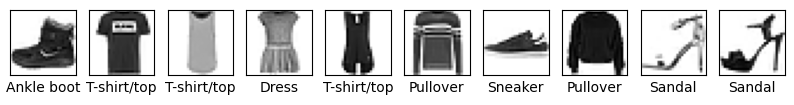

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Роздрукувати 10 зображень
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
# 4. Побудова архітектури моделі
model = Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])

In [5]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Навчання моделі
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data = (train_images, train_labels),
                    callbacks=[early_stopping,reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5735 - loss: 9.5946 - val_accuracy: 0.7732 - val_loss: 0.5961 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7266 - loss: 0.7654 - val_accuracy: 0.7997 - val_loss: 0.5392 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7720 - loss: 0.6434 - val_accuracy: 0.8383 - val_loss: 0.4517 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7835 - loss: 0.6056 - val_accuracy: 0.8487 - val_loss: 0.4270 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7925 - loss: 0.5781 - val_accuracy: 0.8405 - val_loss: 0.4463 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7945 - loss: 0.5745 - val_accuracy: 0.8471 - val_loss: 0.4514 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8280

In [8]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.keras')

Mounted at /content/drive


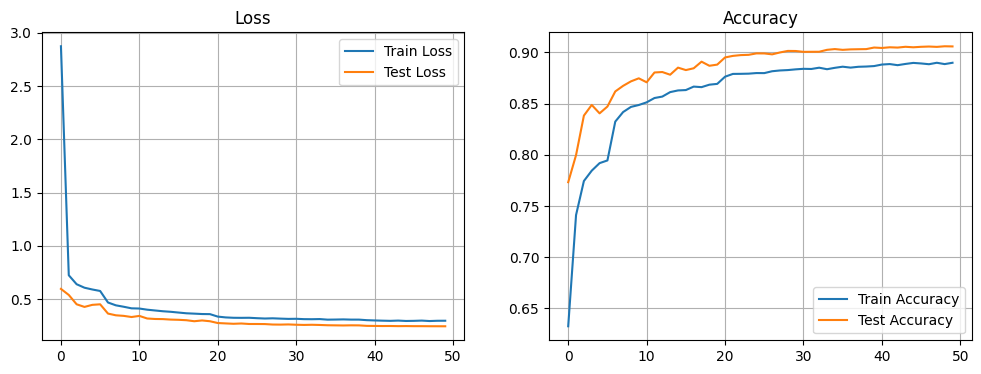

In [9]:
# 8. Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

313/313 - 1s - 5ms/step - accuracy: 0.8772 - loss: 0.3801
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.83      0.83      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.77      0.80      0.79      1000
       Dress       0.85      0.90      0.87      1000
        Coat       0.79      0.77      0.78      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.68      0.65      0.67      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



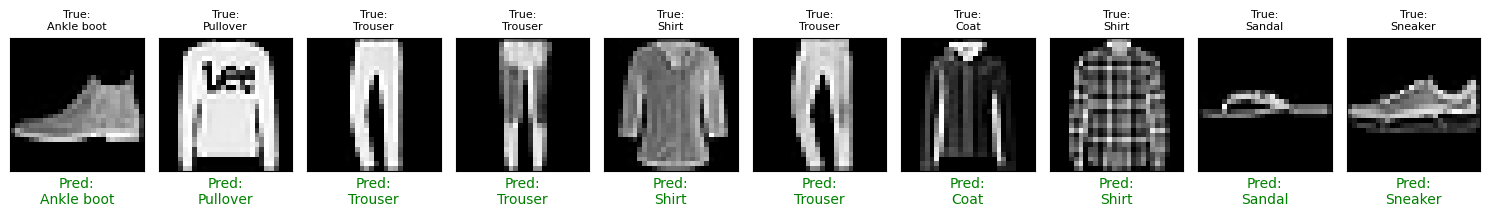

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

# Перетворюємо прогнози в мітки
predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# 10. Результати розпізнавання із прогнозованим і справжнім класом
plt.figure(figsize=(15, 3))  # ширше полотно для зручності

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='gray')  # замість plt.cm.binary для кращої сумісності
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[test_labels[i]]
    color = 'green' if predicted_labels[i] == test_labels[i] else 'red'
    plt.xlabel(f"Pred:\n{pred_label}", color=color)
    plt.title(f"True:\n{true_label}", fontsize=8)

plt.tight_layout()
plt.show()

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from keras_tuner import HyperModel
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Flatten # Import Flatten
from keras_tuner.tuners import RandomSearch #Import RandomSearch

# Завантаження даних Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
# Нормалізація даних
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
# Визначення моделі з гіперпараметрами
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Flatten(input_shape=(28, 28)))

        # Гіперпараметри для кількості шарів та нейронів
        for i in range(hp.Int('num_layers', 1, 4)):
            model.add(layers.Dense(
                units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                activation='relu',
                kernel_regularizer=l2(0.001)
            ))
            model.add(layers.Dropout(0.3))

        model.add(layers.Dense(10, activation='softmax'))

        # Гіперпараметр для оптимізатора та learning_rate
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd'])
        learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        if optimizer_choice == 'adam':
            optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
        else:
            optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

        model.compile(
            optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

# Створення екземпляру HyperModel
hypermodel = MyHyperModel()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)



tuner = RandomSearch(
    hypermodel,  # Pass the HyperModel instance
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

tuner.search(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[early_stopping, reduce_lr])

# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Додаткове тренування найкращої моделі
best_model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[early_stopping, reduce_lr])

# Оцінка моделі
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Trial 3 Complete [00h 06m 50s]
val_accuracy: 0.8881000280380249

Best val_accuracy So Far: 0.8881000280380249
Total elapsed time: 00h 14m 58s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 192)            │        24,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 192)            │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,234 (641.54 KB)

 Trainable params: 164,234 (641.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8256 - loss: 0.5560 - val_accuracy: 0.8462 - val_loss: 0.5253 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8316 - loss: 0.5790 - val_accuracy: 0.8475 - val_loss: 0.5433 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8330 - loss: 0.5852 - val_accuracy: 0.8512 - val_loss: 0.5332 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8351 - loss: 0.5818 - val_accuracy: 0.8473 - val_loss: 0.5385 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8481 - loss: 0.5402 - val_accuracy: 0.8550 - val_loss: 0.5040 - learning_rate: 5.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8577 - loss: 0.5016 - val_accuracy: 0.8622 - val_loss: 0.4758 - learning_rate: 5.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy:

In [12]:
# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
\nClassification Report for Best Model (Fashion MNIST):
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.79      0.81      0.80      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.73      0.68      0.70      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



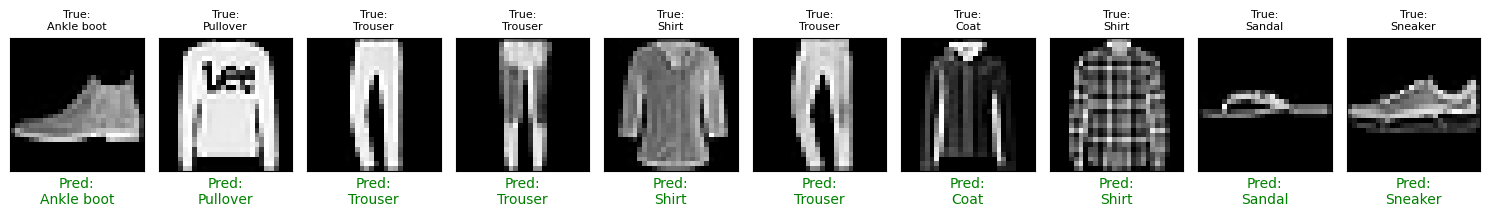

In [13]:
predictions_fashion = best_model.predict(test_images)

# 2. Convert these predictions into labels
predicted_labels_fashion = np.argmax(predictions_fashion, axis=1)

# 3. Print classification report using Fashion MNIST class names
print("\\nClassification Report for Best Model (Fashion MNIST):")
print(classification_report(test_labels, predicted_labels_fashion, target_names=class_names))

# 4. Your plotting code, adapted:
plt.figure(figsize=(15, 3))  # ширше полотно для зручності

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_images[i], cmap='gray') # Or cmap=plt.cm.binary

    # Use predictions from best_model (trained on Fashion) and Fashion MNIST class names
    pred_label = class_names[predicted_labels_fashion[i]]

    # Use true Fashion MNIST labels and class names
    true_label = class_names[test_labels[i]]

    color = 'green' if predicted_labels_fashion[i] == test_labels[i] else 'red'
    plt.xlabel(f"Pred:\n{pred_label}", color=color)
    plt.title(f"True:\n{true_label}", fontsize=8)

plt.tight_layout()
plt.show()

Висновок: було імпортовано вбудований датасет fashion_mnist, створено нейронну мережу за цим датасетом із використанням layers.Dropout. Модель вийшла не дуже точною, маючи тільки 86,78% точності. Оскільки я збільшував к-ть шарів, це означає що збільшення шарів дало негативний результат.
Зменшення кількості шарів значно зменшило точність аж до 81%...
Стандартні значення дали найкращий результат у 87,72%, а підбір параметрів покращив результат до 88,81%.